## Concept

* uses data from the same input variable in a lagged format
* Limited forecast power like simple moving averages

* $ y_t = c + \phi_1 y_{t-1} + .. + \phi_p y_{t-p} + \epsilon_t $

* Variables:
    * $\epsilon$ - irreducible error (white noise)
    * $\phi$ - coefficient
    * p - order
    
* Higher order of p gives better forecasting results, but only to certain point
    

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt

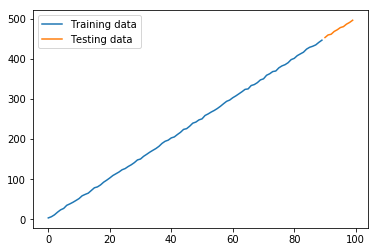

In [6]:
np.random.seed(123)
x = np.arange(0, 500, 5)
y = [i + np.random.random()*5 for i in x]
df = pd.DataFrame(data = {'x': x, 'y': y})

df_train = df[:-10]
df_test = df[-10:]

plt.plot(df_train['y'], label='Training data')
plt.plot(df_test['y'], label='Testing data')
plt.legend();

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


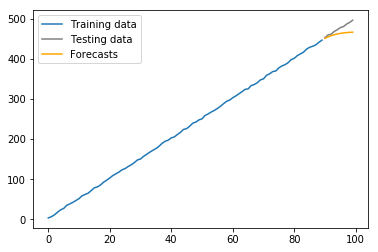

In [10]:
# fit model
model = AR(df_train['y']).fit(maxlag = 2, method = 'mle')
df_test['forecast'] = model.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1,
        dynamic=False)

plt.plot(df_train['y'], label='Training data')
plt.plot(df_test['y'], color='gray', label='Testing data')
plt.plot(df_test['forecast'], color='orange', label='Forecasts')
plt.legend()

## Finding Optimal lag

In [21]:
# Max lag order
max_p = 20
# To store RMSE
errors = {}

for p in range(1, max_p + 1):
    # Train and predict
    model = AR(df_train['y']).fit(maxlag=p, dynamic=False)
    preds = model.predict(
        start=len(df_train),
        end=len(df_train) + len(df_test) - 1,
        dynamic=False
    )
    # Calculate and store RMSE
    error = mean_squared_error(df_test['y'], preds)
    errors[f'AR({p})'] = np.round(error, 2)
errors


{'AR(1)': 2.05,
 'AR(2)': 2.5,
 'AR(3)': 3.72,
 'AR(4)': 3.87,
 'AR(5)': 3.05,
 'AR(6)': 2.62,
 'AR(7)': 2.21,
 'AR(8)': 2.09,
 'AR(9)': 1.45,
 'AR(10)': 1.49,
 'AR(11)': 1.52,
 'AR(12)': 1.47,
 'AR(13)': 2.02,
 'AR(14)': 2.06,
 'AR(15)': 2.19,
 'AR(16)': 2.2,
 'AR(17)': 2.2,
 'AR(18)': 2.01,
 'AR(19)': 1.95,
 'AR(20)': 1.83}

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


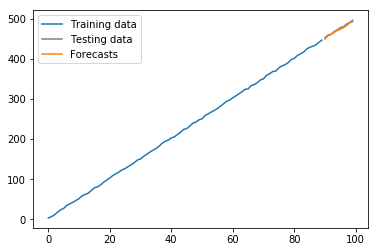

In [20]:
# fit best model
model = AR(df_train['y']).fit(maxlag = 11, method = 'mle')
df_test['forecast'] = model.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1,
        dynamic=False)

plt.plot(df_train['y'], label='Training data')
plt.plot(df_test['y'], color='gray', label='Testing data')
plt.plot(df_test['forecast'], label='Forecasts')
plt.legend()

## Summary

* AR works for simple datasets
* Despite lag 12 found to be optimal, but we need to use it with AIC
* AR models with Airline passengers wont work regardless of order, but if we make stationary it can still wont be better than exp smoothing